In [1]:
import torch
from torch.utils.data import SubsetRandomSampler
from dataloader.ClassificationDataset import InferenceDataset, ClassificationDataset
from models.infer import infer, write_to_file, evaluate
from models.type_classifier import TypeClassifier
from models.train import make_batch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = InferenceDataset(root="/home/janghoon/pneumonia_data")
infer_loader = torch.utils.data.DataLoader(dataset, batch_size=128)

In [4]:
version = "b1"
model_name = f"eagle_eye_models/sehyun/{version}-final1-neg0-cov0/model.pth"
model = TypeClassifier(version=version, num_classes=2).to(device)

checkpoint = torch.load(model_name)
model.load_state_dict(checkpoint["State_dict"])

Loaded pretrained weights for efficientnet-b1


<All keys matched successfully>

In [5]:
predictions = infer(model, infer_loader, device)

[inference]:   0%|          | 0/32 [00:00<?, ?it/s]

inference complete


In [29]:
write_to_file(predictions, dataset, "./inferenced_metadata.csv")

KeyError: 1

In [6]:
import numpy as np
np.where(np.array(predictions) == 0)[0].shape,np.where(np.array(predictions) == 1)[0].shape,np.where(np.array(predictions) == 2)[0].shape

((3688,), (357,), (0,))

## Check image

In [28]:
iterator = iter(infer_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


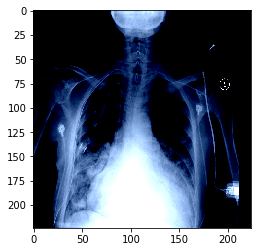

In [39]:
import matplotlib.pyplot as plt

plt.imshow(np.array(next(iterator)[0]).transpose(1,2,0))

## Evaluate

In [16]:
dataset = ClassificationDataset(root="/home/janghoon/pneumonia_data", neg_prop=0, trans=None)

test_loader = torch.utils.data.DataLoader(dataset, batch_size=32, collate_fn=make_batch, sampler=SubsetRandomSampler(dataset.test_idx))

In [17]:
predictions = evaluate(model, test_loader, device)

  0%|          | 0/19 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0000    0.0000    0.0000       168
           2     0.3621    0.1433    0.2054       293
           3     0.0000    0.0000    0.0000       138

    accuracy                         0.0701       599
   macro avg     0.0905    0.0358    0.0513       599
weighted avg     0.1771    0.0701    0.1005       599



/home/janghoon/venvs/eagle_eye/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/janghoon/venvs/eagle_eye/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/janghoon/venvs/eagle_eye/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/janghoon/